In [1]:
import pandas as pd
import numpy as np

In [2]:
mydata=pd.read_csv('PimaIndians.csv')

In [4]:
mydata.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
pregnant     392 non-null int64
glucose      392 non-null int64
diastolic    392 non-null int64
triceps      392 non-null int64
insulin      392 non-null int64
bmi          392 non-null float64
diabetes     392 non-null float64
age          392 non-null int64
test         392 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 27.6+ KB


In [ ]:
mydata.isnull().sum()

In [8]:
clusterdata=mydata.drop('test',axis=1)

In [ ]:
mydata.head(20)

In [9]:
clusterdata.head(20)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59
5,5,166,72,19,175,25.8,0.587,51
6,0,118,84,47,230,45.8,0.551,31
7,1,103,30,38,83,43.3,0.183,33
8,1,115,70,30,96,34.6,0.529,32
9,3,126,88,41,235,39.3,0.704,27


In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,15)
meandist=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    meandist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1))/ clusterdata.shape[0])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [ ]:
import sklearn.cluster as clus

In [ ]:
gt=clus.KMeans(n_clusters=3)

In [ ]:
gt.fit(clusterdata)

In [ ]:
cluster=gt.predict(clusterdata)

In [ ]:
clusterdata['cluster']=cluster

In [ ]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
trace1 = go.Scatter3d(
    x=clusterdata['diabetes'],
    y=clusterdata['glucose'],
    z=clusterdata['bmi'],
    mode='markers',
    marker=dict(
        size=12,
        color=clusterdata['cluster'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')

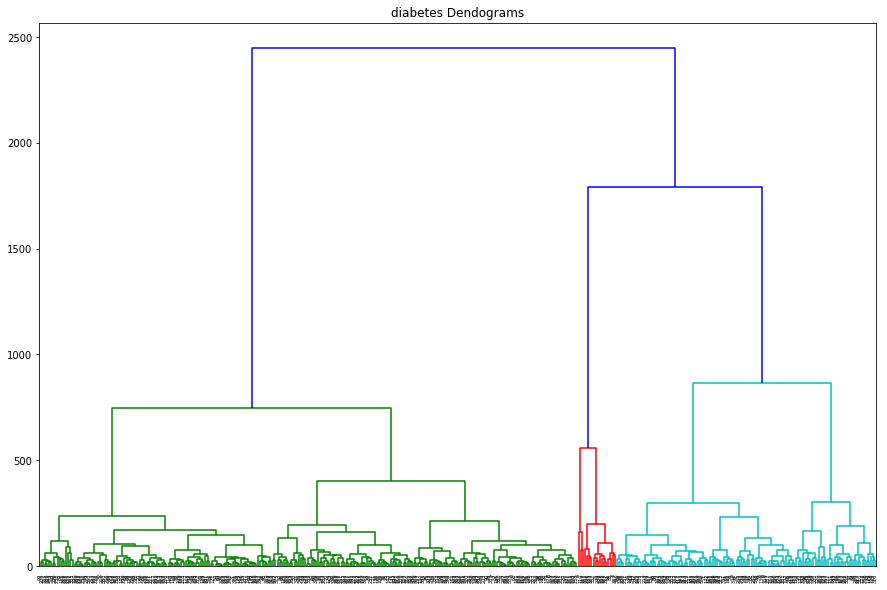

In [10]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))  
plt.title("diabetes Dendograms")  
dend = shc.dendrogram(shc.linkage(clusterdata, method='ward'))  

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [13]:
hc.fit(clusterdata)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x00000000050AA378>)

In [14]:
hc.fit_predict(clusterdata)

array([1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,